##Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import preprocessing
import missingno as msno
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix



##Importing dataset

In [ ]:
datainput = pd.read_csv(r'Customer-Churn.csv')
print("Given input data :\n",datainput)

Given input data :
       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 col

##Understanding the dataset

In [ ]:
datainput.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
datainput.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
datainput.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
datainput.shape

(7043, 21)

In [ ]:
datainput.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
datainput.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

##Feature Selection

In [ ]:
columns = datainput.columns.values.tolist()
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
#Checking for missing values
print(datainput.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
datainput.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 r

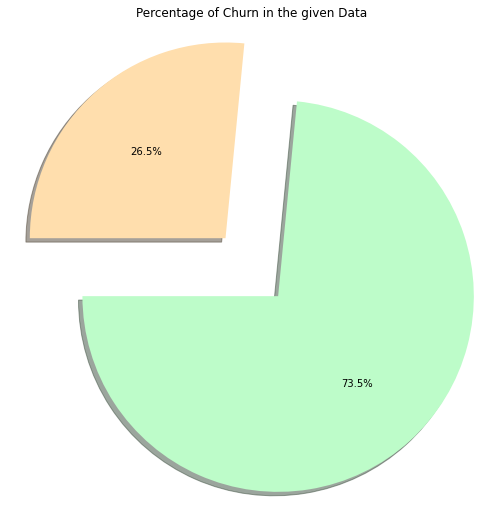

In [ ]:
#Dropping columns
datainput.drop(['customerID'], axis=1, inplace=True)
datainput.pop('TotalCharges')
datainput['OnlineBackup'].unique()

data = datainput['Churn'].value_counts(sort = True)
chroma = ["#BDFCC9","#FFDEAD"]
rcParams['figure.figsize'] = 9,9
explode = [0.2,0.2]
plt.pie(data, explode=explode, colors=chroma, autopct='%1.1f%%', shadow=True, startangle=180,)
plt.title('Percentage of Churn in the given Data')
plt.show()

##Data Preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
datainput['gender'] = label_encoder.fit_transform(datainput['gender'])
datainput['Partner'] = label_encoder.fit_transform(datainput['Partner'])
datainput['Dependents'] = label_encoder.fit_transform(datainput['Dependents'])
datainput['PhoneService'] = label_encoder.fit_transform(datainput['PhoneService'])
datainput['MultipleLines'] = label_encoder.fit_transform(datainput['MultipleLines'])
datainput['InternetService'] = label_encoder.fit_transform(datainput['InternetService'])
datainput['OnlineSecurity'] = label_encoder.fit_transform(datainput['OnlineSecurity'])
datainput['OnlineBackup'] = label_encoder.fit_transform(datainput['OnlineBackup'])
datainput['DeviceProtection'] = label_encoder.fit_transform(datainput['DeviceProtection'])
datainput['TechSupport'] = label_encoder.fit_transform(datainput['TechSupport'])
datainput['StreamingTV'] = label_encoder.fit_transform(datainput['StreamingTV'])
datainput['StreamingMovies'] = label_encoder.fit_transform(datainput['StreamingMovies'])
datainput['Contract'] = label_encoder.fit_transform(datainput['Contract'])
datainput['PaperlessBilling'] = label_encoder.fit_transform(datainput['PaperlessBilling'])
datainput['PaymentMethod'] = label_encoder.fit_transform(datainput['PaymentMethod'])
datainput['Churn'] = label_encoder.fit_transform(datainput['Churn'])
print("input data after label encoder :\n",datainput)


#separating features(X) and label(y)
datainput["Churn"] = datainput["Churn"].astype(int)
y = datainput["Churn"].values
X = datainput.drop(labels = ["Churn"],axis = 1)
print("\nseparated X and y :")
print("y -",y)
print("X -",X)


input data after label encoder :
       gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  Churn
0          0              0        1  ...              2           29.85      0
1          1              0        0  ...              3           56.95      0
2          1              0        0  ...              3           53.85      1
3          1              0        0  ...              0           42.30      0
4          0              0        0  ...              2           70.70      1
...      ...            ...      ...  ...            ...             ...    ...
7038       1              0        1  ...              3           84.80      0
7039       0              0        1  ...              1          103.20      0
7040       0              0        1  ...              2           29.60      0
7041       1              1        1  ...              3           74.40      1
7042       1              0        0  ...              0          105.65      0

[7043

##Training and Testing the Data

In [ ]:

#LabelEncoder()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datainput['gender'] = label_encoder.fit_transform(datainput['gender'])
datainput['Partner'] = label_encoder.fit_transform(datainput['Partner'])
datainput['Dependents'] = label_encoder.fit_transform(datainput['Dependents'])
datainput['PhoneService'] = label_encoder.fit_transform(datainput['PhoneService'])
datainput['MultipleLines'] = label_encoder.fit_transform(datainput['MultipleLines'])
datainput['InternetService'] = label_encoder.fit_transform(datainput['InternetService'])
datainput['OnlineSecurity'] = label_encoder.fit_transform(datainput['OnlineSecurity'])
datainput['OnlineBackup'] = label_encoder.fit_transform(datainput['OnlineBackup'])
datainput['DeviceProtection'] = label_encoder.fit_transform(datainput['DeviceProtection'])
datainput['TechSupport'] = label_encoder.fit_transform(datainput['TechSupport'])
datainput['StreamingTV'] = label_encoder.fit_transform(datainput['StreamingTV'])
datainput['StreamingMovies'] = label_encoder.fit_transform(datainput['StreamingMovies'])
datainput['Contract'] = label_encoder.fit_transform(datainput['Contract'])
datainput['PaperlessBilling'] = label_encoder.fit_transform(datainput['PaperlessBilling'])
datainput['PaymentMethod'] = label_encoder.fit_transform(datainput['PaymentMethod'])
datainput['Churn'] = label_encoder.fit_transform(datainput['Churn'])
#print("input data after label encoder :\n",datainput)



#separating features(X) and label(y)
datainput["Churn"] = datainput["Churn"].astype(int)
Y = datainput["Churn"].values
X = datainput.drop(labels = ["Churn"],axis = 1)

#train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print("\npredicted values :\n",Y_pred)


predicted values :
 [0 0 0 ... 0 0 0]


In [ ]:
#Accuracy
LR = metrics.accuracy_score(Y_test, Y_pred) * 100
print("\nThe accuracy score using the LR is -> ",LR)

#confusion matrix
cm=confusion_matrix(Y_test,Y_pred)
print("\nconfusion matrix : \n",cm)


The accuracy score using the LR is ->  79.77288857345636

confusion matrix : 
 [[908 118]
 [167 216]]


##Weight of the variables

In [ ]:
#weights of all the variables
wt = pd.Series(classifier.coef_[0], index=X.columns.values)
print("\nweight of all the variables :")
print(wt.sort_values(ascending=False))



weight of all the variables :
PaperlessBilling    0.332171
InternetService     0.252426
SeniorCitizen       0.200794
MultipleLines       0.070586
Partner             0.056842
PaymentMethod       0.045633
MonthlyCharges      0.028143
StreamingMovies     0.016230
StreamingTV        -0.010805
gender             -0.033732
tenure             -0.036316
DeviceProtection   -0.044551
OnlineBackup       -0.122318
Dependents         -0.158722
OnlineSecurity     -0.215262
TechSupport        -0.266091
Contract           -0.715039
PhoneService       -0.989551
dtype: float64
